In [ ]:
""" 
Goolge Trends - Searching Topics
ie: https://trends.google.com/trends/explore?geo=AU&q=domestic%20violence

Example code found:
https://towardsdatascience.com/google-trends-api-for-python-a84bc25db88f

Install https://pypi.org/project/pytrends/
!pip install pytrends

Trend Categories:
https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories
Some examples:
News: 16
Health: 45
Public Safety: 166
Law & Government: 19
Social Services: 508

Pytrend functions:
- Interest Over Time
- Historical Hourly Interest
- Interest by Region
- Related Topics
- Related Queries
- Trending Searches
- Top Charts
- Suggestions

# NLP for Sentiment Analysis
# https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

"""

In [266]:
# Load pandas
import numpy as np
import pandas as pd
from os import path
from PIL import Image

#load matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from pytrends.request import TrendReq

#from platform import python_version
#print(python_version())

# update to your own local folder where to save nodes/edges output files
# this folder for me, just happened to be where I kicked off Jupyter Notebook
dir_save = '~/Projects/big_data_eng/bde_lab_2'

# which folders host all the python files
import sys
print(sys.path)

['/Users/paipac/Projects/big_data_eng/bde_lab_2', '/opt/anaconda3/lib/python37.zip', '/opt/anaconda3/lib/python3.7', '/opt/anaconda3/lib/python3.7/lib-dynload', '', '/Users/paipac/.local/lib/python3.7/site-packages', '/opt/anaconda3/lib/python3.7/site-packages', '/opt/anaconda3/lib/python3.7/site-packages/aeosa', '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions', '/Users/paipac/.ipython']


## Setup Google Trends API

In [2]:
# Main keywords query to Google Trends - max 5
def pytrend_google(kw_list, timeframe='today 3-m', geo='AU', cat=0):
    pytrend = TrendReq()
    pytrend.build_payload(kw_list=kw_list, geo='AU', timeframe=timeframe, cat=0)
    return pytrend

In [62]:
# Google Trend search parameters
kw_list=['domestic violence']
timeframe='today 12-m'
geo='AU'
cat=0

# Run build_payload to retrieve trend data
pytrend = pytrend_google(kw_list, timeframe, geo, cat)

# Google related_queries
related_queries_dict=pytrend.related_queries()

# Google related_topics
related_topics_dict=pytrend.related_topics()

# Google related_topics
interest_over_time_dict=pytrend.interest_over_time()

"""
# Other API calls
pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
pytrends.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)
pytrends.trending_searches(pn='australia') 
pytrends.top_charts(date, hl='en-US', tz=300, geo='GLOBAL')
pytrends.suggestions(keyword)
pytrends.categories()
"""

"\n# Other API calls\npytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)\npytrends.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)\npytrends.trending_searches(pn='australia') \npytrends.top_charts(date, hl='en-US', tz=300, geo='GLOBAL')\npytrends.suggestions(keyword)\npytrends.categories()\n"

In [63]:
# expand dictionary items
def expand_dictionary(dict):
    for p_id, p_info in dict.items():
        print("\nPerson ID:", p_id)
        for key in p_info:
            #print(key + ':', p_info[key]) 
            print(key + ':')         
        return p_info

# expand dictionary for Google Top results
def results_top(dict, key='top', items=['topic_title','topic_type','value']):
    df_top = expand_dictionary(dict)
    df_top = df_top[key] 
    df_top = df_top[items]
    return df_top    


# expand dictionary for Google Rising results
def results_rising(dict, key='top', items=['topic_title','topic_type','value']):
    df_rising = expand_dictionary(dict)
    df_rising = df_rising[key] 
    df_rising = df_rising[items]
    return df_rising

In [66]:
# Top Results - Related Topics
df_top_topics = results_top(related_topics_dict, key='top', items=['topic_title','topic_type','value'])
df_top_topics


Person ID: domestic violence
rising:
top:


,topic_title,topic_type,value
0,Domestic violence,Topic,100
1,Violence,Topic,97
2,Children's film,Film genre,9
3,Family,Topic,9
4,Woman,Topic,8
5,Epidemiology of domestic violence,Topic,6
6,Abuse,Topic,6
7,Police,Organization type,5
8,Legislation,Topic,5
9,Statistics,Discipline,4


In [67]:
# Top Results - Related Queries
df_top_queries = results_top(related_queries_dict, key='top', items=['query','value'])
df_top_queries


Person ID: domestic violence
top:
rising:


,query,value
0,domestic violence australia,100
1,what is domestic violence,42
2,domestic violence statistics,40
3,domestic violence in australia,38
4,domestic violence qld,36
5,domestic violence victoria,23
6,domestic violence statistics australia,16
7,domestic violence covid,15
8,domestic violence helpline,14
9,domestic violence definition,13


In [68]:
# Rising Results - Related 
df_rising_topics = results_rising(related_topics_dict, key='top', items=['topic_title','topic_type','value'])
df_rising_topics


Person ID: domestic violence
rising:
top:


,topic_title,topic_type,value
0,Domestic violence,Topic,100
1,Violence,Topic,97
2,Children's film,Film genre,9
3,Family,Topic,9
4,Woman,Topic,8
5,Epidemiology of domestic violence,Topic,6
6,Abuse,Topic,6
7,Police,Organization type,5
8,Legislation,Topic,5
9,Statistics,Discipline,4


In [69]:
# Rising Results - Related Queries
df_rising_queries = results_rising(related_queries_dict, key='top', items=['query','value'])
df_rising_queries


Person ID: domestic violence
top:
rising:


,query,value
0,domestic violence australia,100
1,what is domestic violence,42
2,domestic violence statistics,40
3,domestic violence in australia,38
4,domestic violence qld,36
5,domestic violence victoria,23
6,domestic violence statistics australia,16
7,domestic violence covid,15
8,domestic violence helpline,14
9,domestic violence definition,13


## Setup Wordcloud for Google Trend results

In [100]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [101]:
# convert multiple rows to one big string
text = df_rising_queries['query']
text = text.str.cat(sep=', ')
text

'domestic violence australia, what is domestic violence, domestic violence statistics, domestic violence in australia, domestic violence qld, domestic violence victoria, domestic violence statistics australia, domestic violence covid, domestic violence helpline, domestic violence definition, domestic violence hotline, domestic violence wa, commonwealth bank domestic violence, domestic violence sa, domestic and family violence protection act 2012, crimes domestic and personal violence act, family and domestic violence leave, sean connery domestic violence'

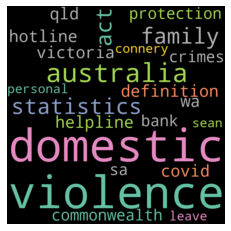

In [105]:
# Create and generate a word cloud image:   
wordcloud = WordCloud(width = 800, height = 800, random_state=1, background_color='black', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Run Wikipedia and Wordcloud API for 'Domestic Violence'

In [3]:
# run next step check if already installed
# !pip3 show wikipedia

Name: wikipedia
Version: 1.4.0
Summary: Wikipedia API for Python
Home-page: https://github.com/goldsmith/Wikipedia
Author: Jonathan Goldsmith
Author-email: jhghank@gmail.com
License: MIT
Location: /Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages
Requires: beautifulsoup4, requests
Required-by: 


In [25]:
# WEBSCRAPING example code
# Install packages if not already installed
# !pip3 install wikipedia
# !pip3 install wordcloud

# changing to folder where wikipedia.py exists helps to import successfully
# import wikipedia step would not work for me without changing directory first
!cd '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages'
import wikipedia
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pylab as plt

In [23]:
# Specify the title of the Wikipedia page
wiki = wikipedia.page('Domestic Violence')

# Extract the plain text content of the page
text = wiki.content

# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')
text

'Domestic violence (also named domestic abuse or family violence) is violence or other abuse in a domestic setting, such as in marriage or cohabitation. Domestic violence is often used as a synonym for intimate partner violence, which is committed by one of the people in an intimate relationship against the other person, and can take place in heterosexual or same-sex relationships, or between former spouses or partners. In its broadest sense, domestic violence also involves violence against children, teenagers, parents, or the elderly. It takes multiple forms, including physical, verbal, emotional, economic, religious, reproductive, and sexual abuse, which can range from subtle, coercive forms to marital rape and to violent physical abuse such as choking, beating, female genital mutilation, and acid throwing that results in disfigurement or death. Domestic murders include stoning, bride burning, honor killing, and dowry death (which sometimes involve non-cohabitating family members).Gl

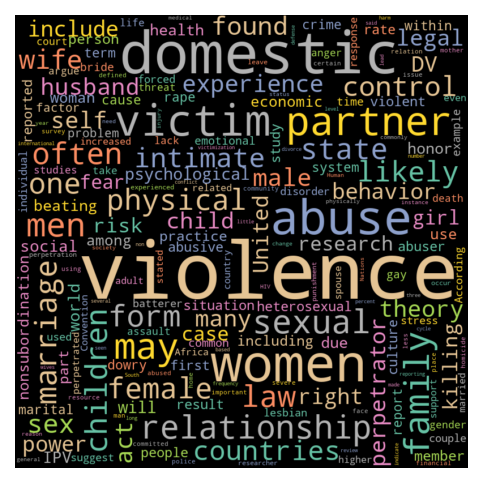

In [34]:
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create and generate a word cloud image:   
wordcloud = WordCloud(width = 800, height = 800, random_state=1, background_color='black', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS).generate(text)

# Display the generated image:
# import matplotlib.pylab as plt
# plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 150
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Repeat Wikipedia and Wordcloud API for AirBNB

In [36]:
# Specify the title of the Wikipedia page
wiki = wikipedia.page('airbnb')

# Extract the plain text content of the page
text = wiki.content

# Clean text
text = re.sub(r'==.*?==+', '', text)
text = text.replace('\n', '')
text

'Airbnb, Inc. (pronounced  AIR-bee-ehn-bee and stylized as airbnb) operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. It is based in San Francisco, California. The platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com.The company has been criticized for a direct correlation between increases in the number of its listings and increases in nearby rent prices, and creating nuisances for those living near leased properties. In response, the company has attracted regulatory attention from cities such as San Francisco and New York City, and the European Union. It has also faced challenges from the hotel industry and other competitors. After moving to San Francisco in Oc

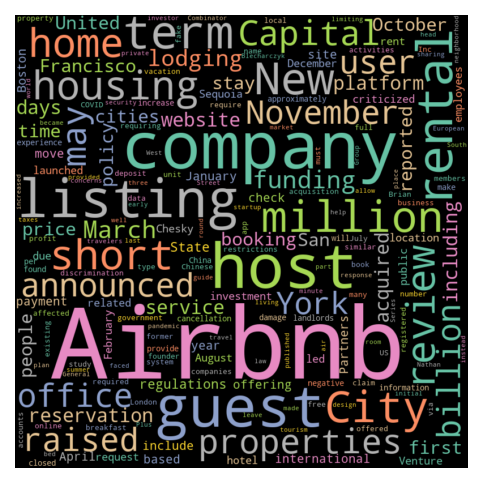

In [37]:
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Create and generate a word cloud image:   
wordcloud = WordCloud(width = 800, height = 800, random_state=1, background_color='black', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS).generate(text)

# Display the generated image:
# import matplotlib.pylab as plt
# plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 150
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Create unique Wordcloud that related to AirBNB, eg: houses

In [91]:
# update to your own local folders
%cd '~/Documents/0 A SINA'
!ls

/Users/paipac/Documents/0 A SINA


In [55]:
# Save the image in the img folder:
wordcloud.to_file("Img/first_review.png")

In [93]:
# save black image from Goolge Images, to local folder, then load as np.array()
house_mask = np.array(Image.open("Img/image_house.png"))
house_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

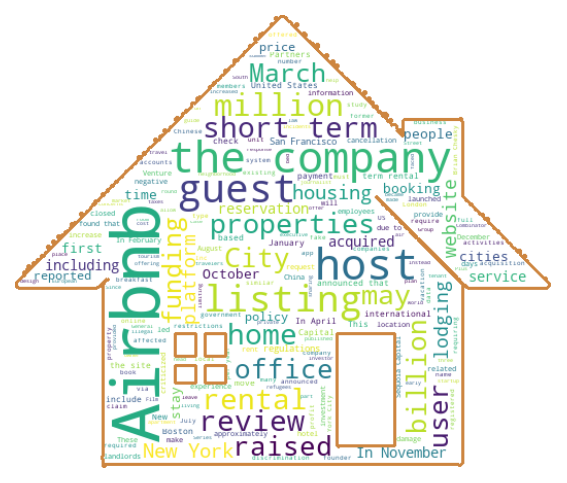

In [90]:
#https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib

# Create a word cloud image using masked image loaded as np.array(), ie:house_mask
wc = WordCloud(background_color="white", max_words=1000, mask=house_mask,
               stopwords=STOPWORDS, contour_width=3, contour_color='peru').generate(text)

# store to file
wc.to_file("Img/house.png")

# show
# plt.figure(figsize=[20,10])
plt.rcParams['figure.dpi'] = 150
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Load masked image as np.array
house_mask = np.array(Image.open("Img/image_house.png"))

# Create a word cloud image using original text
wc = WordCloud(background_color="white", max_words=1000, mask=house_mask,
               stopwords=STOPWORDS, contour_width=3, contour_color='peru').generate(text)

# store to file - optional
wc.to_file("Img/house.png")

# show
plt.rcParams['figure.dpi'] = 150
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Load and analyse AirBNB Review data

In [94]:
%cd '~/Documents/0 A SINA'

# AIR BNB REVIEWS
data = pd.read_csv('Data/airbnb_reviews_dec18.csv')
df_air = data.copy()
#df = df.fillna(0)
df_air.head()

/Users/paipac/Documents/0 A SINA


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,12351,68394,2010-07-24,45760,Anna,This was my first Airbnb experience and I am h...
1,12351,76453,2010-08-09,148786,Stuart,"As my first AirBnB experience, this was a magn..."
2,12351,83283,2010-08-23,190202,Angel,Like many others this was my first AirBnB expe...
3,12351,91580,2010-09-06,219308,Meisy,"Vinh and Stuart were very warm and hospitable,..."
4,12351,100903,2010-09-20,191976,Dayna,I had a wonderful experience staying with Vinh...


In [100]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446708 entries, 0 to 446707
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     446708 non-null  int64 
 1   id             446708 non-null  int64 
 2   date           446708 non-null  object
 3   reviewer_id    446708 non-null  int64 
 4   reviewer_name  446708 non-null  object
 5   comments       446261 non-null  object
dtypes: int64(3), object(3)
memory usage: 20.4+ MB


In [101]:
df_air.describe()

,listing_id,id,reviewer_id
count,4.467080e+05,4.467080e+05,4.467080e+05
mean,1.315875e+07,1.985958e+08,7.017468e+07
std,7.881954e+06,9.822034e+07,5.925081e+07
min,1.235100e+04,6.839400e+04,1.290000e+02
25%,5.842987e+06,1.224815e+08,2.115625e+07
50%,1.375122e+07,2.124414e+08,5.154460e+07
75%,1.981784e+07,2.761456e+08,1.106364e+08
max,3.054962e+07,3.560919e+08,2.292105e+08


In [130]:
# 446708 total rows
# 367666 unique reviewers
review_count = df_air[['reviewer_id']].copy()
review_count = review_count['reviewer_id'].value_counts().reset_index()
review_count.columns = ['reviewer_id','count']
review_count.head()

,reviewer_id,count
0,6343345,66
1,39397787,56
2,77645251,53
3,68447360,53
4,78093968,45


In [133]:
# 77 reviewers leaving 20 or above reviews
review_count = review_count[review_count['count']>=20].copy()
print('Reviewers >= 20 reviews :',len(review_count))

# merge (inner join) review data with only reviewer-id count >= 20
df_reviews = df_air.copy()
df_reviews = review_count.merge(df_reviews, on='reviewer_id', how='inner')
print('Reduced Review data rows:',len(test_2))

Reviewers >= 20 reviews : 77
Reduced Review data rows: 2078


In [152]:
df_reviews

,reviewer_id,count,listing_id,id,date,reviewer_name,comments
0,6343345,66,12351,109304860,2016-10-20,David,Great hosts and prefect location. i was made t...
1,6343345,66,360141,4908992,2013-06-01,David,Scott was the extremely friendly & a great hos...
2,6343345,66,1106059,255231899,2018-04-20,David,Great host who goes out of her way to make you...
3,6343345,66,2320694,262739282,2018-05-10,David,Place is as described and Rebecca is a warm fr...
4,6343345,66,3657826,231374333,2018-02-01,David,Everything was as described and had lovely con...
...,...,...,...,...,...,...,...
2073,30019772,20,26669688,319260672,2018-09-06,Mel & Richard,Amy and her family are so generous and welcomi...
2074,30019772,20,26669688,322337069,2018-09-13,Mel & Richard,A lovely place to stay (again!) - always so we...
2075,30019772,20,26669688,335014907,2018-10-11,Mel & Richard,"Again, a real pleasure coming back to stay wit..."
2076,30019772,20,26669688,343796192,2018-11-01,Mel & Richard,"Working locally, I stay here often and it is a..."


In [276]:
# create nodes for Reviewers
df_nodes_1 = df_reviews[['reviewer_id','reviewer_name']].copy()
df_nodes_1 = pd.DataFrame(df_nodes_1.groupby(['reviewer_id','reviewer_name']).count().reset_index())
df_nodes_1['type'] = 'reviewer'
df_nodes_1.columns = ['node_id','label','type']
df_nodes_1

,node_id,label,type
0,980703,Wayne & Kate,reviewer
1,2318728,Dirk,reviewer
2,2790530,Brooke,reviewer
3,5192518,Grant,reviewer
4,6137657,Alison,reviewer
...,...,...,...
72,161091188,Owen,reviewer
73,168806289,Stephen,reviewer
74,169191690,Keith,reviewer
75,170816828,Geoff,reviewer


In [277]:
# create nodes for Listings
df_nodes_2 = df_reviews[['listing_id']].copy()
df_nodes_2 = pd.DataFrame(df_nodes_2.groupby(['listing_id']).count().reset_index())
df_nodes_2['label'] = df_nodes_2['listing_id']
df_nodes_2['type'] = 'listing'
df_nodes_2.columns = ['node_id','label','type']
df_nodes_2

,node_id,label,type
0,12351,12351,listing
1,20865,20865,listing
2,73639,73639,listing
3,77792,77792,listing
4,85331,85331,listing
...,...,...,...
987,30026321,30026321,listing
988,30054848,30054848,listing
989,30331342,30331342,listing
990,30334092,30334092,listing


In [278]:
# Combine as stack formation - vertical, ie: axis=0
nodes = pd.concat([df_nodes_1, df_nodes_2], axis=0)
nodes

,node_id,label,type
0,980703,Wayne & Kate,reviewer
1,2318728,Dirk,reviewer
2,2790530,Brooke,reviewer
3,5192518,Grant,reviewer
4,6137657,Alison,reviewer
...,...,...,...
987,30026321,30026321,listing
988,30054848,30054848,listing
989,30331342,30331342,listing
990,30334092,30334092,listing


In [263]:
# create year as a group
df_reviews['year'] = ['{}'.format(x)[0:4] for x in df_reviews['date']]
df_reviews.head()

,reviewer_id,count,listing_id,id,date,reviewer_name,comments,year
0,6343345,66,12351,109304860,2016-10-20,David,Great hosts and prefect location. i was made t...,2016
1,6343345,66,360141,4908992,2013-06-01,David,Scott was the extremely friendly & a great hos...,2013
2,6343345,66,1106059,255231899,2018-04-20,David,Great host who goes out of her way to make you...,2018
3,6343345,66,2320694,262739282,2018-05-10,David,Place is as described and Rebecca is a warm fr...,2018
4,6343345,66,3657826,231374333,2018-02-01,David,Everything was as described and had lovely con...,2018


In [252]:
df_edges = df_reviews[['reviewer_id','listing_id','id','year']].copy()
df_edges.head()

,reviewer_id,listing_id,id,year
0,6343345,12351,109304860,2016
1,6343345,360141,4908992,2013
2,6343345,1106059,255231899,2018
3,6343345,2320694,262739282,2018
4,6343345,3657826,231374333,2018


## Perform NLP Sentiment Analysis on Review Comments

In [163]:
# NLP for Sentiment Analysis
# https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk
# !pip3 install nltk==3.3

     |████████████████████████████████| 1.4 MB 4.6 MB/s eta 0:00:01
Using legacy 'setup.py install' for nltk, since package 'wheel' is not installed.
    Running setup.py install for nltk ... done


In [169]:
# download NLKT API's
import nltk
nltk.download('twitter_samples')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/paipac/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package punkt to /Users/paipac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/paipac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/paipac/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paipac/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [168]:
# %cd '~/Documents/0 A SINA'
# %cd '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages'
# pwd

'/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages'

In [173]:
# IMPORT all the NLKT libraries & APIs
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier

import re, string, random

/Users/paipac/Documents/0 A SINA


In [175]:
# helper function
def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)


[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]
Accuracy is: 0.9936666666666667
Most Informative Features
                      :) = True           Positi : Negati =   1001.2 : 1.0
                follower = True           Positi : Negati =     37.1 : 1.0
                followed = True           Negati : Positi =     24.9 : 1.0
                     sad = True           Negati : Positi =     24.6 : 1.0
                     bam = True           Positi : Negati =     20.4 : 1.0
                  arrive = True           Positi : Negati =     18.7 : 1.0
                congrats = True           Positi : Negati =     13.0 : 1.0
                   didnt = True           Negati : Positi =     13.0 : 1.0
                    sick = True           Negati : Positi =     12.6 : 1.0
               goodnight = True           Positi : Negati =     11.7 : 1.0
None
I ordered just once from TerribleCo, 

In [191]:
#positive_tweets

In [192]:
#negative_tweets

In [193]:
#tweet_tokens

In [194]:
#negative_tweet_tokens

In [195]:
#print(freq_dist_pos.most_common(10))

In [196]:
#positive_dataset

In [ ]:
if __name__ == "__main__":

    positive_tweets = twitter_samples.strings('positive_tweets.json')
    negative_tweets = twitter_samples.strings('negative_tweets.json')
    text = twitter_samples.strings('tweets.20150430-223406.json')

    stop_words = stopwords.words('english')

    tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]
    positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
    negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

    positive_cleaned_tokens_list = []
    negative_cleaned_tokens_list = []

    for tokens in positive_tweet_tokens:
        positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    for tokens in negative_tweet_tokens:
        negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

    all_pos_words = get_all_words(positive_cleaned_tokens_list)

    freq_dist_pos = FreqDist(all_pos_words)
    print(freq_dist_pos.most_common(10))

    positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
    negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

    positive_dataset = [(tweet_dict, "Positive")
                         for tweet_dict in positive_tokens_for_model]

    negative_dataset = [(tweet_dict, "Negative")
                         for tweet_dict in negative_tokens_for_model]

    dataset = positive_dataset + negative_dataset

    #--------------------------------------------
    random.shuffle(dataset)

    train_data = dataset[:7000]
    test_data = dataset[7000:]

    classifier = NaiveBayesClassifier.train(train_data)

    print("Accuracy is:", classify.accuracy(classifier, test_data))

    print(classifier.show_most_informative_features(10))

    #--------------------------------------------
    custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."
    custom_tweet = "We had such a fabulous time."

    custom_tokens = remove_noise(word_tokenize(custom_tweet))

    print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))

In [190]:
    # ---- Testing -----------------------------------------
    custom_tweet = "We had such a time. :("

    custom_tokens = remove_noise(word_tokenize(custom_tweet))

    print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))

We had such a time. :( Negative


In [177]:
print(positive_tweet_tokens[500])
print(positive_cleaned_tokens_list[500])

['Dang', 'that', 'is', 'some', 'rad', '@AbzuGame', '#fanart', '!', ':D', 'https://t.co/bI8k8tb9ht']
['dang', 'rad', '#fanart', ':d']


In [222]:
    # ---- Testing -----------------------------------------
    custom_tweet = "We had such a time. :("

    custom_tokens = (word_tokenize(custom_tweet))

    print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))

We had such a time. :( Negative


In [237]:
# EXTRACT REVIEW COMMENTS
df_comments = df_reviews[['id','comments']].copy()
# remove rows where comments are empty, na
df_comments = df_comments.dropna()
df_comments.head()

,id,comments
0,109304860,Great hosts and prefect location. i was made t...
1,4908992,Scott was the extremely friendly & a great hos...
2,255231899,Great host who goes out of her way to make you...
3,262739282,Place is as described and Rebecca is a warm fr...
4,231374333,Everything was as described and had lovely con...


In [238]:
# check for any NULL/NA comment rows
df_comments.isna().sum()

id          0
comments    0
dtype: int64

In [239]:
# positive_dataset = [(tweet_dict, "Positive") for tweet_dict in positive_tokens_for_model]
# df.apply(lambda row: nltk.word_tokenize(row['sentences']), axis=1)
# df_comments['tokens'] = df_comments.apply(lambda row: nltk.word_tokenize(row['comments']), axis=1)

# APPLY nltk.word_tokenize function to all comments in dataframe
df_comments['tokens'] = df_comments["comments"].apply(nltk.word_tokenize)

# APPLY remove_noise function to all tokens in dataframe
df_comments['custom'] = df_comments["tokens"].apply(remove_noise)

# remove tokens column
df_comments = df_comments.drop(columns=['tokens'])

# save for quick viewing
df_comments.to_csv(dir_save + '/df_comments.csv')

df_comments.head

<bound method NDFrame.head of              id                                           comments  \
0     109304860  Great hosts and prefect location. i was made t...   
1       4908992  Scott was the extremely friendly & a great hos...   
2     255231899  Great host who goes out of her way to make you...   
3     262739282  Place is as described and Rebecca is a warm fr...   
4     231374333  Everything was as described and had lovely con...   
...         ...                                                ...   
2073  319260672  Amy and her family are so generous and welcomi...   
2074  322337069  A lovely place to stay (again!) - always so we...   
2075  335014907  Again, a real pleasure coming back to stay wit...   
2076  343796192  Working locally, I stay here often and it is a...   
2077  346232856        Another relaxed, comfortable stay. So good!   

                                                 custom  
0     [great, host, and, prefect, location, i, be, m...  
1     [scott,

In [270]:
# df.apply(lambda row: nltk.word_tokenize(row['sentences']), axis=1)
# df_comments['tokens'] = df_comments.apply(lambda row: nltk.word_tokenize(row['comments']), axis=1)

# rewrite this one line, for all rows in dataframe using apply & lambda functionality
# print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))

# APPLY NLKT model - classifier - to all rows to create 'sentiment'
df_comments['sentiment'] = df_comments.apply(lambda row: classifier.classify(dict([token, True] for token in row['comments'])), axis=1)

# Generate sentiment weighting value - Positive=2, Negative=1
df_comments['weight'] = [2 if df=='Positive' else 1 for df in df_comments['sentiment']] 

# save for quick viewing of comments & sentiments
df_comments.to_csv(dir_save + '/df_comments.csv')

In [272]:
# quick check
df_comments.head()

,id,comments,custom,sentiment,weight
0,109304860,Great hosts and prefect location. i was made t...,"[great, host, and, prefect, location, i, be, m...",Positive,2
1,4908992,Scott was the extremely friendly & a great hos...,"[scott, be, the, extremely, friendly, a, great...",Positive,2
2,255231899,Great host who goes out of her way to make you...,"[great, host, who, go, out, of, her, way, to, ...",Positive,2
3,262739282,Place is as described and Rebecca is a warm fr...,"[place, be, as, described, and, rebecca, be, a...",Positive,2
4,231374333,Everything was as described and had lovely con...,"[everything, be, as, described, and, have, lov...",Negative,1


In [273]:
# Final Edges information
edges = df_edges.merge(df_comments, on='id', how='inner')
edges = edges.drop(columns=['comments','custom'])

print('Edges combined Sentiment:',len(edges),'\n')
print(edges.head())

Edges combined Sentiment: 2076 

   reviewer_id  listing_id         id  year sentiment  weight
0      6343345       12351  109304860  2016  Positive       2
1      6343345      360141    4908992  2013  Positive       2
2      6343345     1106059  255231899  2018  Positive       2
3      6343345     2320694  262739282  2018  Positive       2
4      6343345     3657826  231374333  2018  Negative       1


In [274]:
# REVERSE Listing/Reviewer order for different graph
edges_rev = edges[['listing_id','reviewer_id','sentiment','weight']]
print('Edges reverse Listing/Reviewer:',len(edges_rev),'\n')
print(edges_rev.head())

Edges reverse Listing/Reviewer: 2076 

   listing_id  reviewer_id sentiment  weight
0       12351      6343345  Positive       2
1      360141      6343345  Positive       2
2     1106059      6343345  Positive       2
3     2320694      6343345  Positive       2
4     3657826      6343345  Negative       1


In [279]:
# FINAL NODE & EDGE FILES FOR LOADING INTO NETWORK GRAPHING
# save data to: '/Users/paipac/Documents/0 A SINA'
nodes.to_csv(dir_save + '/airbnb_nodes.csv', index=False)
edges.to_csv(dir_save + '/airbnb_edges.csv', index=False)
edges_rev.to_csv(dir_save + '/airbnb_edges_rev.csv', index=False)

In [ ]:
# Open network graph tool - quicker that Gephi for checking
# https://app.flourish.studio/projects

In [ ]:
# FROM DVN - potential code for further investigation, not used for above results
if 1==2:
    sentiment_dict = { 0: 'negative', 1: 'neutral', 2: 'positive' }

    # Retrieve 12 colours from the Colorbrewer palette
    # NOTE: You'll nee more colours if there are more than 12 artists
    colours=palettable.colorbrewer.get_map('Paired', 'Qualitative', 12).colors

    #https://colorbrewer2.org/#type=sequential&scheme=YlOrRd&n=3
    colours_senti = { 0: [ 66,146,198 ], 1: [ 55,255,204 ], 2: [ 254,178,76 ] }

    #colours_subjective = { 0: [247,104,161], 1: [255,255,204], 2: [8,48,107] }

    # For consistent shuffling results set random seed
    random.seed(4)
